In [93]:
import re
import string
import pandas as pd
import nltk
from collections import Counter
from pywsd.utils import lemmatize_sentence
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('youtoxic_english_1000.csv')

In [101]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [token for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

In [102]:
df['Text_cleaned'] = df['Text'].apply(lambda x: clean_text(x))

In [103]:
df['Text_split'] = df['Text_cleaned'].apply(lambda x: x.split())
df['Text_tokenized'] = df['Text_cleaned'].apply(lambda x: nltk.word_tokenize(x))
df['Text_lemmatized'] = df['Text_cleaned'].apply(lambda x: lemmatize_sentence(x))

In [104]:
cats = ['IsToxic', 'IsAbusive', 'IsThreat']
text_split_dist = []
text_tokenized_dist = []
text_lemmatized_dist = []
for cat in cats:
    counters_text_split = [Counter(df[df[cat]]['Text_split'].iloc[i]) for i in
                           range(len(df[df[cat]]['Text_split']))]

    counters_text_tokenized = [Counter(df[df[cat]]['Text_tokenized'].iloc[i]) for i in
                               range(len(df[df[cat]]['Text_tokenized']))]

    counters_text_lemmatized = [Counter(df[df[cat]]['Text_lemmatized'].iloc[i]) for i in
                                range(len(df[df[cat]]['Text_lemmatized']))]

    text_split_dist.append(sum(counters_text_split, Counter()))
    text_tokenized_dist.append(sum(counters_text_tokenized, Counter()))
    text_lemmatized_dist.append(sum(counters_text_lemmatized, Counter()))

IsToxic – Частотный список (Не лемматизированные)

In [105]:
text_split_dist[0].most_common(20)

[('people', 122),
 ('black', 103),
 ('like', 71),
 ('get', 69),
 ('white', 63),
 ('police', 62),
 ('would', 52),
 ('shot', 48),
 ('dont', 44),
 ('fuck', 40),
 ('Brown', 39),
 ('shit', 38),
 ('cop', 35),
 ('one', 33),
 ('guy', 33),
 ('man', 32),
 ('racist', 30),
 ('cops', 30),
 ('officer', 30),
 ('got', 28)]

IsToxic – Частотный список (Лемматизированные)

In [106]:
text_lemmatized_dist[0].most_common(20)

[('black', 162),
 ('people', 130),
 ('get', 126),
 ('white', 94),
 ('fuck', 85),
 ('like', 75),
 ('police', 74),
 ('cop', 71),
 ('would', 59),
 ('brown', 59),
 ('go', 58),
 ('dont', 53),
 ('say', 49),
 ('shot', 48),
 ('shit', 45),
 ('officer', 45),
 ('shoot', 44),
 ('make', 44),
 ('kill', 43),
 ('guy', 43)]

IsToxic – Частотный список (Токенизированные)

In [107]:
text_tokenized_dist[0].most_common(20)

[('people', 122),
 ('black', 103),
 ('like', 71),
 ('get', 69),
 ('white', 63),
 ('police', 62),
 ('would', 52),
 ('shot', 48),
 ('dont', 44),
 ('fuck', 40),
 ('Brown', 39),
 ('shit', 38),
 ('cop', 35),
 ('one', 33),
 ('guy', 33),
 ('man', 32),
 ('racist', 30),
 ('cops', 30),
 ('officer', 30),
 ('got', 28)]

IsAbusive – Частотный список (Не лемматизированные)

In [108]:
text_split_dist[1].most_common(20)

[('people', 74),
 ('black', 63),
 ('get', 52),
 ('police', 51),
 ('would', 37),
 ('fuck', 37),
 ('like', 34),
 ('shot', 34),
 ('dont', 33),
 ('shit', 33),
 ('guy', 30),
 ('cop', 29),
 ('Brown', 28),
 ('white', 27),
 ('cops', 25),
 ('one', 24),
 ('ass', 23),
 ('shoot', 22),
 ('man', 21),
 ('stupid', 21)]

IsAbusive – Частотный список (Лемматизированные)

In [68]:
text_lemmatized_dist[1].most_common(20)

[('get', 95),
 ('fuck', 81),
 ('black', 80),
 ('people', 77),
 ('police', 61),
 ('cop', 59),
 ('brown', 42),
 ('go', 41),
 ('would', 39),
 ('shit', 39),
 ('dont', 38),
 ('like', 38),
 ('guy', 37),
 ('shoot', 34),
 ('kill', 33),
 ('shot', 33),
 ('run', 33),
 ('white', 30),
 ('officer', 30),
 ('one', 29)]

IsAbusive – Частотный список (Токенизированные)

In [67]:
text_tokenized_dist[1].most_common(20)

[('people', 74),
 ('black', 63),
 ('get', 52),
 ('police', 51),
 ('would', 37),
 ('fuck', 37),
 ('like', 34),
 ('shot', 34),
 ('dont', 33),
 ('shit', 33),
 ('guy', 30),
 ('cop', 29),
 ('Brown', 28),
 ('white', 27),
 ('cops', 25),
 ('one', 24),
 ('ass', 23),
 ('shoot', 22),
 ('man', 21),
 ('stupid', 21)]

IsThreat – Частотный список (Не лемматизированные)

In [66]:
text_split_dist[2].most_common(20)

[('get', 6),
 ('need', 4),
 ('protesters', 3),
 ('ran', 3),
 ('would', 3),
 ('police', 2),
 ('time', 2),
 ('cops', 2),
 ('ass', 2),
 ('even', 2),
 ('back', 2),
 ('shoot', 2),
 ('driver', 2),
 ('drivers', 2),
 ('cop', 2),
 ('start', 2),
 ('beat', 2),
 ('one', 2),
 ('run', 2),
 ('EYE', 2)]

IsThreat – Частотный список (Лемматизированные)

In [65]:
text_lemmatized_dist[2].most_common(20)

[('get', 7),
 ('kill', 4),
 ('cop', 4),
 ('need', 4),
 ('driver', 4),
 ('run', 4),
 ('shit', 3),
 ('shoot', 3),
 ('protester', 3),
 ('would', 3),
 ('start', 3),
 ('police', 2),
 ('id', 2),
 ('time', 2),
 ('fire', 2),
 ('ass', 2),
 ('let', 2),
 ('even', 2),
 ('back', 2),
 ('catalyst', 2)]

IsThreat – Частотный список (Токенизированные)

In [77]:
text_tokenized_dist[2].most_common(20)

[('get', 6),
 ('need', 4),
 ('protesters', 3),
 ('ran', 3),
 ('would', 3),
 ('police', 2),
 ('time', 2),
 ('cops', 2),
 ('ass', 2),
 ('even', 2),
 ('back', 2),
 ('shoot', 2),
 ('driver', 2),
 ('drivers', 2),
 ('cop', 2),
 ('start', 2),
 ('beat', 2),
 ('one', 2),
 ('run', 2),
 ('EYE', 2)]

In [109]:
dists = []
for i in range(len(cats)):
    dists.append(text_split_dist[i].most_common(20))
    dists.append(text_lemmatized_dist[i].most_common(20))
    dists.append(text_tokenized_dist[i].most_common(20))

In [110]:
len(dists[0])

20

In [111]:
titles = ['IsToxic – Частотный список (Не лемматизированные)', 'IsToxic – Частотный список (Лемматизированные)',
          'IsToxic – Частотный список (Токенизированные)', 'IsAbusive – Частотный список (Не лемматизированные)',
          'IsAbusive – Частотный список (Лемматизированные)', 'IsAbusive – Частотный список (Токенизированные)',
          'IsThreat – Частотный список (Не лемматизированные)', 'IsThreat – Частотный список (Лемматизированные)',
          'IsThreat – Частотный список (Токенизированные)']

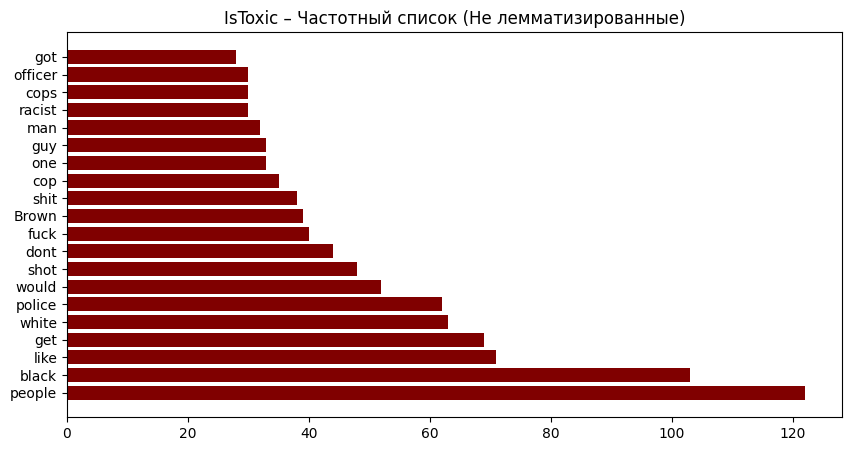

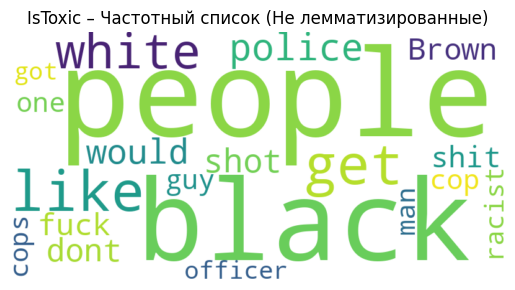

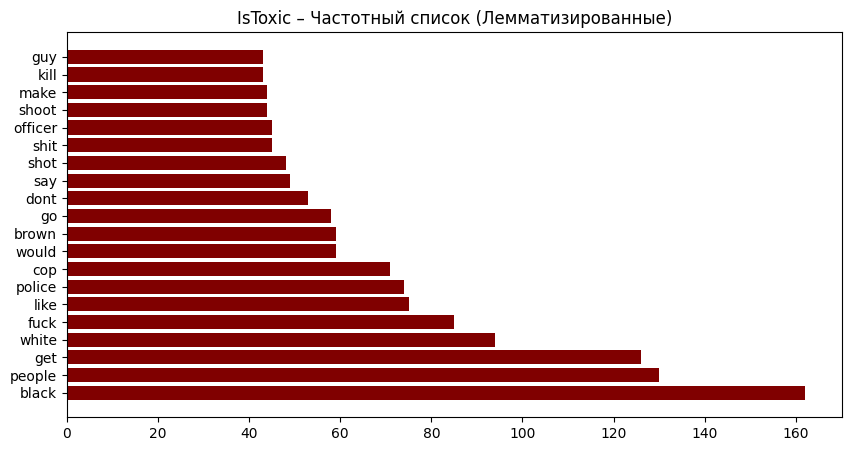

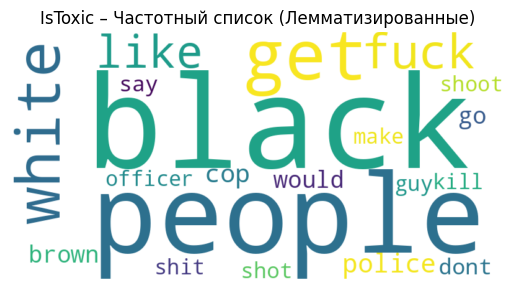

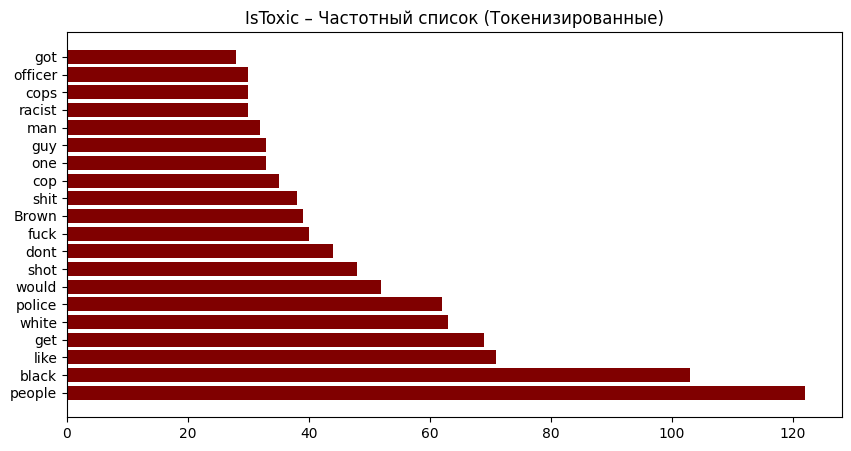

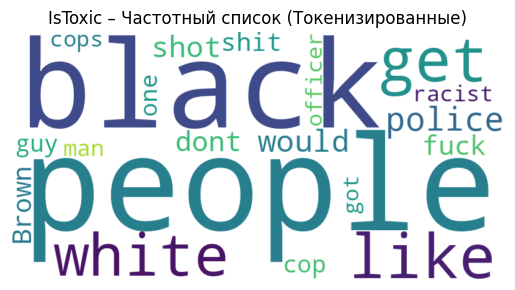

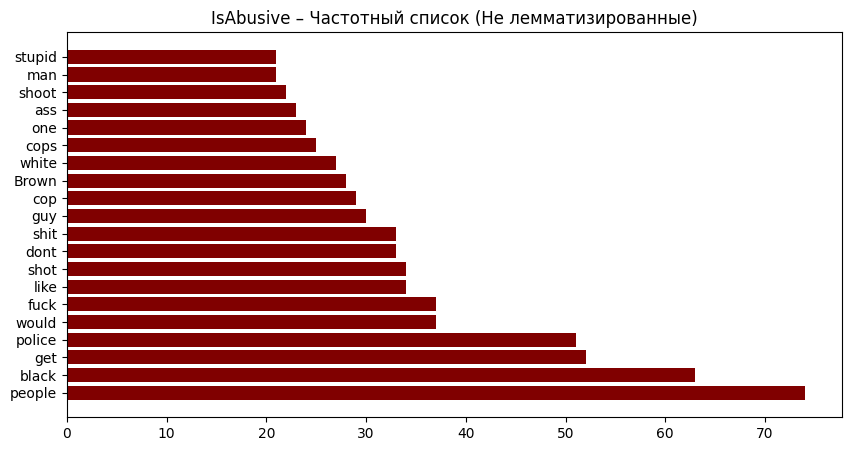

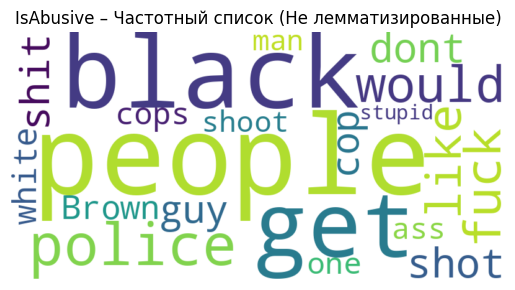

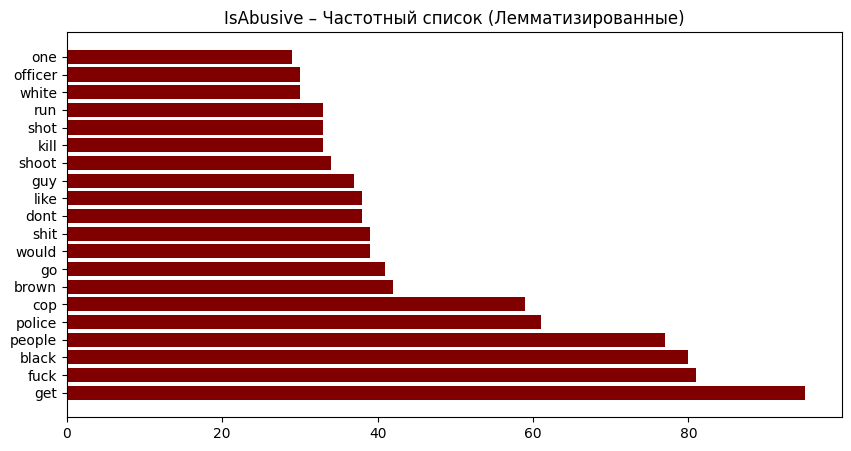

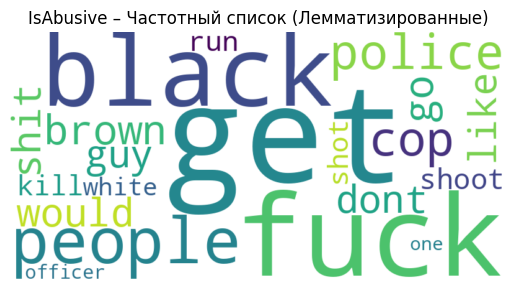

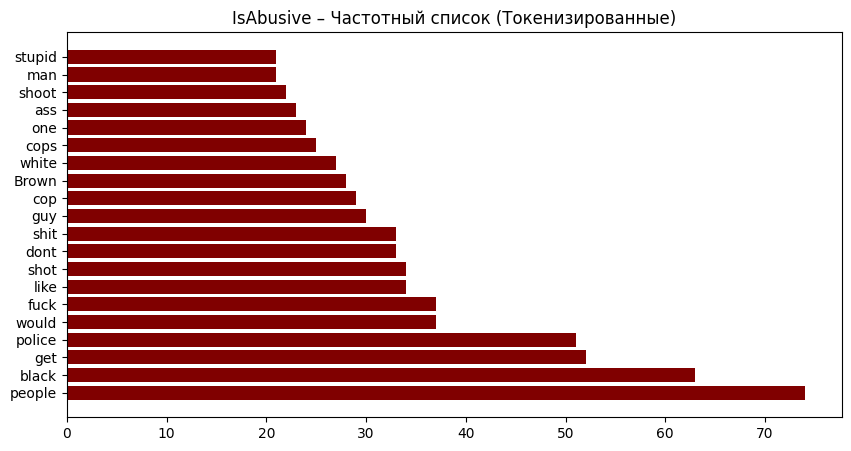

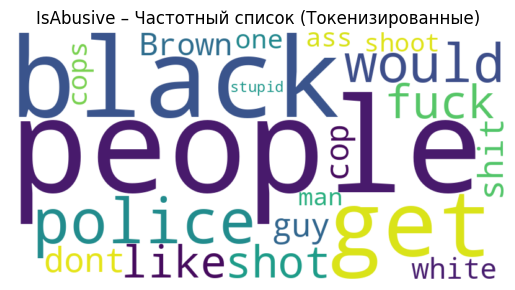

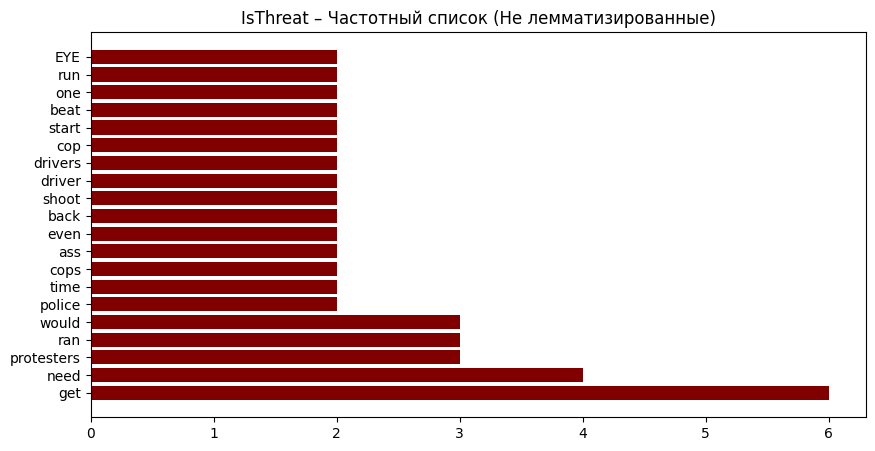

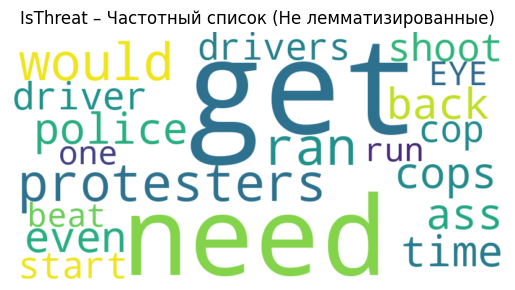

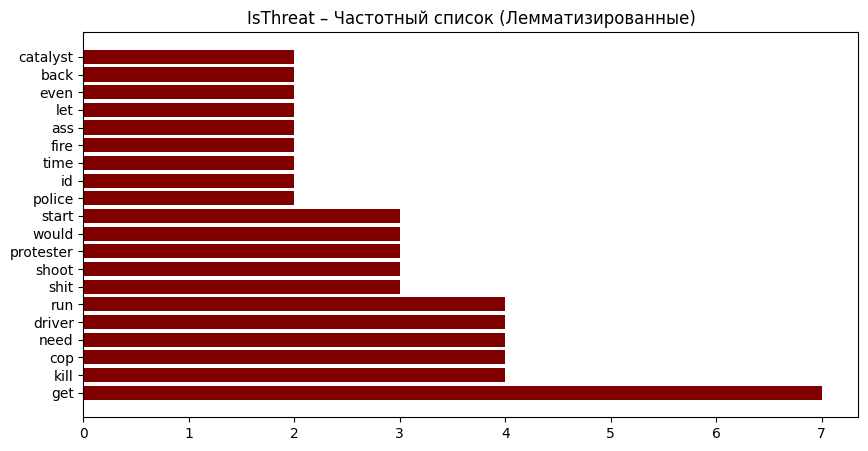

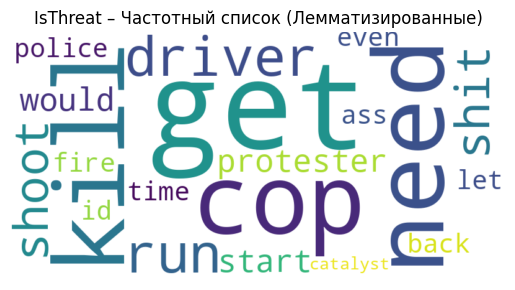

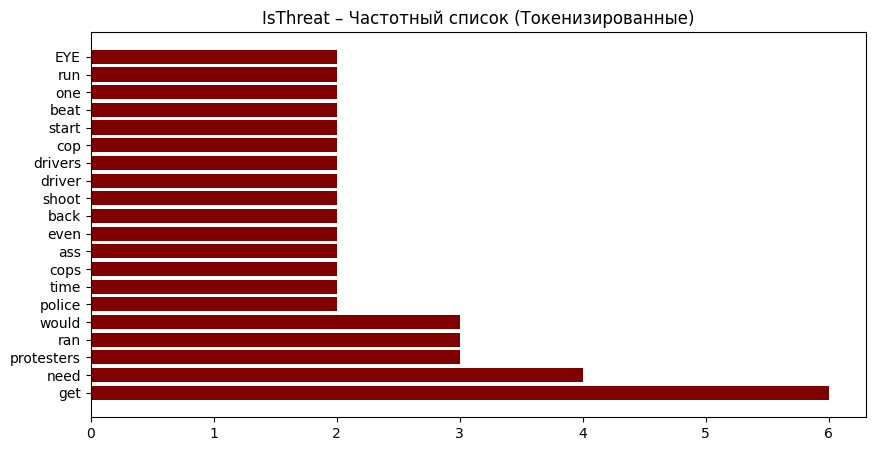

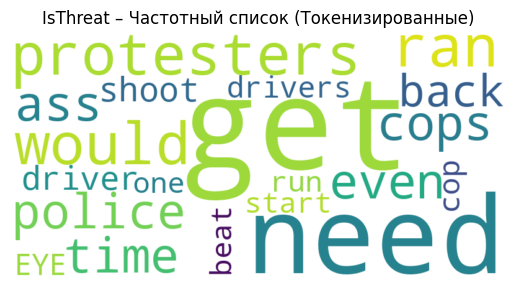

In [112]:

for i in range(len(dists)):
    labels, counts = [], []
    for x, y in dists[i]:
        labels.append(x)
        counts.append(y)
    fig = plt.figure(figsize=(10, 5))
    plt.barh(labels, counts, color='maroon')
    plt.title(titles[i])
    plt.show()

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(dists[i]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titles[i])
    plt.axis('off')
    plt.show()